# Import data
Import data downloaded from lantmäteriet (https://geotorget.lantmateriet.se/geodataprodukter/markhojdmodell-nedladdning-grid-50)

In [1]:
import rasterio
import numpy as np

tif_filename = r"/home/chris/projects/ifk-storm-water-management/data/64_3_2023.tif"
tfw_filename = tif_filename.split(".")[0] + r".tfw"

with rasterio.open(tif_filename) as f:
    data = f.read()

with open(tfw_filename, "r") as f:
    tfw = [float(x) for x in f.readlines()]
    print(tfw)

elev_max = np.amax(data)


[50.0, 0.0, 0.0, -50.0, 300025.0, 6499975.0]


# Plot elevation data

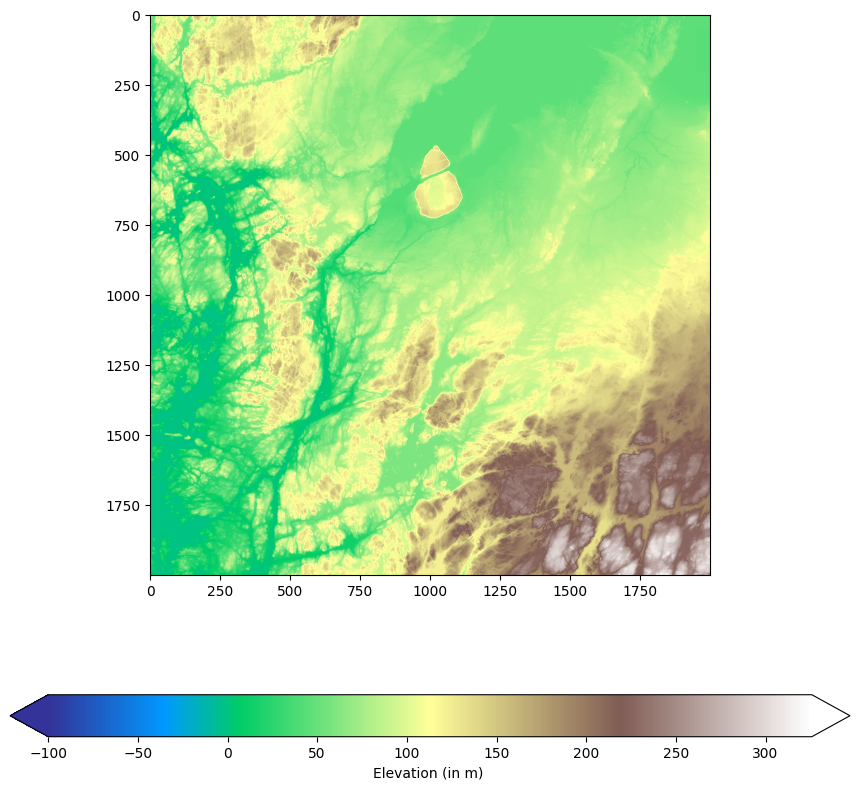

In [3]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=[12,8])
ax = fig.add_axes([0, 0, 1, 1])
raster_image=ax.imshow(data[0],cmap="terrain",vmax=elev_max,vmin=-100)
fig.colorbar(raster_image, ax=ax,label="Elevation (in m) ",orientation='horizontal',extend='both',shrink=0.7)
plt.show()



# Calculate accumulated flow
Using richdem, calculate acumulated flow. Use D8 algorithm, i.e., use 8 directions for each cell (diagonal cells are included.)

On flat areas, fill depressions with small gradient. Otherwise the flow will be difficult to calculate in these areas. Another approch is to use canals. 

How to handle water, like lakes and oceans? 

Need to set geodata to dem file. Maybe we need to import using gdal instead of using richddems wrapper. 


A Priority-Flood+Epsilon
C Barnes, R., Lehman, C., Mulla, D., 2014. Priority-flood: An optimal depression-filling and watershed-labeling algorithm for digital elevation models. Computers & Geosciences 62, 117–127. doi:10.1016/j.cageo.2013.04.024

c topology = D8
p Setting up boolean flood array matrix...
p Adding cells to the priority queue...
p Performing Priority-Flood+Epsilon...
t succeeded in 1.25401 s======================] (100% - 0.0s - 1 threads)
m Cells processed = 4000000
m Cells in pits = 777150
W W In assigning negligible gradients to depressions, some depressions rose above the surrounding cells. This implies that a larger storage type should be used. The problem occured for 2781 of 4000000.

A O'Callaghan (1984)/Marks (1984) D8/D4 Flow Accumulation
C O'Callaghan, J.F., Mark, D.M., 1984. The Extraction of Drainage Networks from Digital Elevation Data. Computer vision, graphics, and image processing 28, 323--344.

c topology = D8
[==========================================

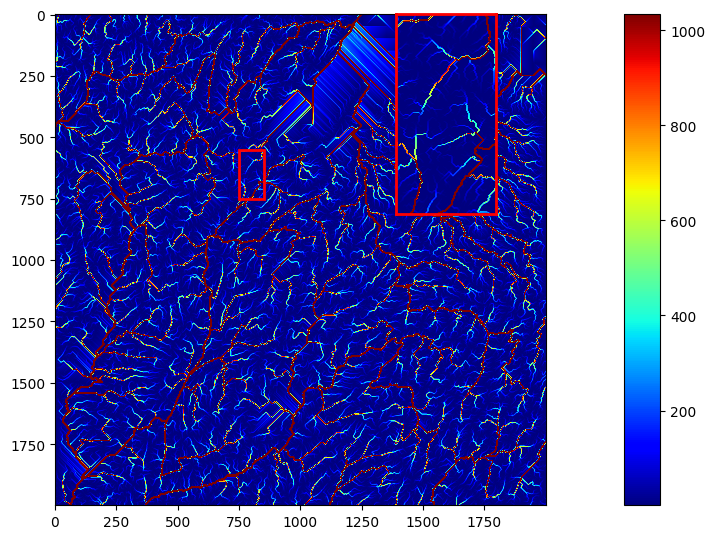

In [4]:
import richdem as rd

dem = rd.LoadGDAL(tif_filename, no_data=-9999)

#Fill depressions with epsilon gradient to ensure drainage
rd.FillDepressions(dem, epsilon=True, in_place=True)

#Get flow accumulation with no explicit weighting. The default will be 1.
accum_d8 = rd.FlowAccumulation(dem, method='D8')
d8_fig = rd.rdShow(accum_d8, zxmin=750, zxmax=850, zymin=750, zymax=550, figsize=(8,5.5), cmap='jet')